In [1]:
import numpy as np
import pandas as pd
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Viz
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

# Remove this later
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [295]:
df=pd.read_csv("new_ongo_aggregated.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(2)

,Missing_source_Month1,segment_ios_source_Month1,segment_tre_source_Month1,source_Month1_Total,Missing_source_Month2,segment_ios_source_Month2,segment_tre_source_Month2,source_Month2_Total,Missing_source_Week1,segment_ios_source_Week1,segment_tre_source_Week1,source_Week1_Total,Missing_source_Week2,segment_ios_source_Week2,segment_tre_source_Week2,source_Week2_Total,Missing_source_Week3,segment_ios_source_Week3,segment_tre_source_Week3,source_Week3_Total,Missing_source_Week4,segment_ios_source_Week4,segment_tre_source_Week4,source_Week4_Total,Missing_source_Week5,segment_ios_source_Week5,segment_tre_source_Week5,source_Week5_Total,Missing_source_Week6,segment_ios_source_Week6,segment_tre_source_Week6,source_Week6_Total,Missing_source_Week7,segment_ios_source_Week7,segment_tre_source_Week7,source_Week7_Total,Missing_source_Week8,segment_ios_source_Week8,segment_tre_source_Week8,source_Week8_Total,source_Weekday_count_Total,source_Weekday_nunique_Total,source_Weekday_count_Total.1,source_Weekday_nunique_Total.1,Total_source,Main_activity_count_Total,Other_main_activity_Month1,closed_session_main_activity_Month1,completed_session_main_activity_Month1,identified_app_user_main_activity_Month1,interacted_with_media_main_activity_Month1,logged_daily_mindfulness_main_activity_Month1,logged_daily_sleep_main_activity_Month1,logged_daily_weight_main_activity_Month1,logged_elevated_heart_rate_main_activity_Month1,logged_in_main_activity_Month1,logged_steps_main_activity_Month1,opened_app_main_activity_Month1,pressed_next_main_activity_Month1,received_error_main_activity_Month1,started_app_session_main_activity_Month1,started_session_main_activity_Month1,viewed_screen_main_activity_Month1,viewed_session_element_main_activity_Month1,main_activity_Month1_Total,Other_main_activity_Month2,closed_session_main_activity_Month2,completed_session_main_activity_Month2,identified_app_user_main_activity_Month2,interacted_with_media_main_activity_Month2,logged_daily_mindfulness_main_activity_Month2,logged_daily_sleep_main_activity_Month2,logged_daily_weight_main_activity_Month2,logged_elevated_heart_rate_main_activity_Month2,logged_in_main_activity_Month2,logged_steps_main_activity_Month2,opened_app_main_activity_Month2,pressed_next_main_activity_Month2,received_error_main_activity_Month2,started_app_session_main_activity_Month2,started_session_main_activity_Month2,viewed_screen_main_activity_Month2,viewed_session_element_main_activity_Month2,main_activity_Month2_Total,Other_main_activity_Week1,closed_session_main_activity_Week1,completed_session_main_activity_Week1,identified_app_user_main_activity_Week1,interacted_with_media_main_activity_Week1,logged_daily_mindfulness_main_activity_Week1,logged_daily_sleep_main_activity_Week1,logged_daily_weight_main_activity_Week1,logged_elevated_heart_rate_main_activity_Week1,logged_in_main_activity_Week1,logged_steps_main_activity_Week1,opened_app_main_activity_Week1,pressed_next_main_activity_Week1,received_error_main_activity_Week1,started_app_session_main_activity_Week1,started_session_main_activity_Week1,viewed_screen_main_activity_Week1,viewed_session_element_main_activity_Week1,main_activity_Week1_Total,Other_main_activity_Week2,closed_session_main_activity_Week2,completed_session_main_activity_Week2,identified_app_user_main_activity_Week2,interacted_with_media_main_activity_Week2,logged_daily_mindfulness_main_activity_Week2,logged_daily_sleep_main_activity_Week2,logged_daily_weight_main_activity_Week2,logged_elevated_heart_rate_main_activity_Week2,logged_in_main_activity_Week2,logged_steps_main_activity_Week2,opened_app_main_activity_Week2,pressed_next_main_activity_Week2,received_error_main_activity_Week2,started_app_session_main_activity_Week2,started_session_main_activity_Week2,viewed_screen_main_activity_Week2,viewed_session_element_main_activity_Week2,main_activity_Week2_Total,Other_main_activity_Week3,closed_session_main_activity_Week3,completed_session_main_activity_Week3,identified_app_user_main_ac

In [296]:
# Remove duplicate columns
duplicated_feat = []
for i in range(0, len(df.columns)):
    col_1 = df.columns[i]
    for col_2 in df.columns[i + 1:]: 
        # if the features are duplicated
        if df[col_1].equals(df[col_2]):
            #print them
            #print(col_1)
            #print(col_2)
            #print()
            duplicated_feat.append(col_2)


df1 = df.drop(columns=duplicated_feat)
print(f'No. of columns before removing duplicate features {df.shape[1]}, After removing duplicate features {df1.shape[1]}')

No. of columns before removing duplicate features 1126, After removing duplicate features 822


In [297]:
# Removing any features that has more than 80% missing values
cols_2_drop = df1.columns[df1.isna().mean()>.38]
df1 = df1.drop(columns=cols_2_drop)
#df1 = df1.fillna(0)
len(cols_2_drop)

713

In [298]:
df1 = df1.fillna(0)
df1.shape

(553, 109)

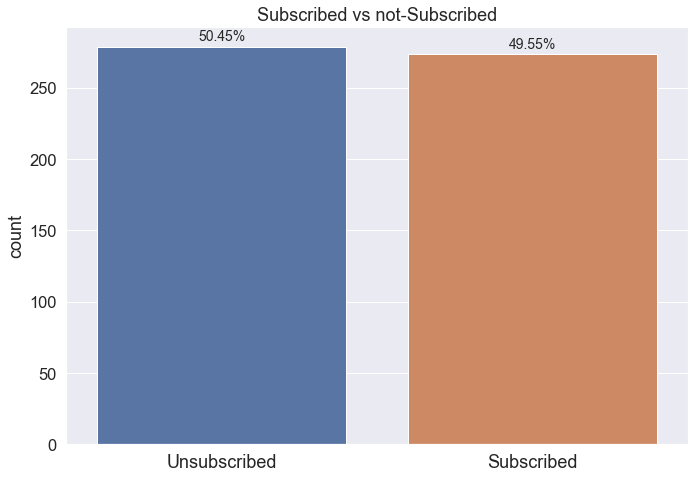

In [299]:
# function for countplot
def bplot_perc(col, data, title, xlabel, ax=None, hue=None):
    sns.set(font_scale=1.5)
    sns.countplot(col, data=data, ax=ax, hue=hue)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticklabels(['Unsubscribed','Subscribed'],size=18);
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 4, '{:1.2f}%'.format((height/total)*100), ha="center", size=14) 
    plt.tight_layout()   
    plt.show()

# plot for target variable
f,ax=plt.subplots(1,1,figsize = (10,7))
bplot_perc(col='subscription', data=df1, title='Subscribed vs not-Subscribed', xlabel='', ax=ax)

In [300]:
df1.shape

(553, 109)

In [301]:
df2 = pd.get_dummies(df1.drop(columns=['owner', 'subscription']))
df2.shape

(553, 109)

In [302]:
df1.columns

Index(['Missing_source_Month1', 'source_Month1_Total', 'Missing_source_Week1', 'source_Week1_Total', 'source_Weekday_count_Total', 'source_Weekday_nunique_Total', 'source_Weekday_count_Total.1', 'source_Weekday_nunique_Total.1', 'Total_source', 'Other_main_activity_Month1',
       ...
       'opened_app_main_activity_vs_activity_occurence_std_Week1', 'received_error_main_activity_vs_activity_occurence_std_Week1', 'viewed_screen_main_activity_vs_activity_occurence_std_Week1', 'main_activity_main_activity_vs_activity_occurence_std_Week_Total1', 'Avg_Weekday_Count_Total', 'Avg_Weekend_Count_Total', 'shared_apple_data', 'kmeans_pred', 'owner', 'subscription'], dtype='object', length=109)

In [303]:
# Data is imbalanced, we need to balance out the dataset
X = df2
y = df1['subscription']

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((387, 109), (166, 109), (387,), (166,))

In [305]:
cols = X_train.columns
ix_train = X_train.index
ix_test = X_test.index

In [306]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns=cols, index=ix_train)
X_test = pd.DataFrame(X_test, columns=cols, index=ix_test)

In [307]:
# data pre-processing
from sklearn.preprocessing import StandardScaler
# importing all the required ML packages
from sklearn.model_selection import train_test_split # training and testing data split
# importing all the required ML packages
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.ensemble import RandomForestClassifier # random Forest
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#from sklearn import metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV

# Models
logreg = LogisticRegression(random_state=0) # Logistic Regression
randomforest = RandomForestClassifier(n_estimators=100, random_state=0) # Random Forest
gbk = GradientBoostingClassifier(random_state=0) # Gradient Boosting Classifier
xgb = XGBClassifier()
lgb = LGBMClassifier(boosting_type='gbdt')

In [308]:
# Model quality prediction
from termcolor import colored
model_names = ['LogisticRegression', 'RandomForest', 'GradientBoosting', 'XGBoost', 'LightGBM']
models = [logreg,randomforest, gbk, xgb, lgb]

# original data
a_stdz = [X_train]
b_stdz = [y_train]
c_stdz = [X_test]
d_stdz = [y_test]

# SMOTE data
#a1_stdz = [X_train1]
#b1_stdz = [y_train1]
#c1_stdz = [X_test]
#d1_stdz = [y_test]

# function for model quality prediction
def model_quality(model):
    for i in range(len(a_stdz)):
        print('ORIGINAL DATA')
        model.fit(a_stdz[i], b_stdz[i])
        accuracy_model = round(model.score(c_stdz[i], d_stdz[i]) *100,2)
        print('accuracy :',accuracy_model, "\n")
        auc = roc_auc_score(d_stdz[i], model.predict(c_stdz[i]))
        print ("AUC = %2.2f" % auc)
        print (classification_report(d_stdz[i], model.predict(c_stdz[i])))
        
   # for i in range(len(a1_stdz)):
   #     print('='*66)
   #     print('SMOTE DATA')
   #     model.fit(a1_stdz[i], b1_stdz[i])
   #     accuracy_model = round(model.score(c1_stdz[i], d1_stdz[i]) *100,2)
   #     print('accuracy :',accuracy_model, "\n")
   #     auc = roc_auc_score(d1_stdz[i], model.predict(c1_stdz[i]))
   #     print ("AUC = %2.2f" % auc)
   #     print (classification_report(d1_stdz[i], model.predict(c1_stdz[i])))

for i in range(len(models)):
    print('■'*22, '\033[1m' + colored(model_names[i], 'green'), '■'*23)
    model_quality(models[i])
    print ("\n\n")

■■■■■■■■■■■■■■■■■■■■■■ LogisticRegression ■■■■■■■■■■■■■■■■■■■■■■■
ORIGINAL DATA
accuracy : 71.08 

AUC = 0.71
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        90
           1       0.66      0.75      0.70        76

    accuracy                           0.71       166
   macro avg       0.71      0.71      0.71       166
weighted avg       0.72      0.71      0.71       166




■■■■■■■■■■■■■■■■■■■■■■ RandomForest ■■■■■■■■■■■■■■■■■■■■■■■
ORIGINAL DATA
accuracy : 79.52 

AUC = 0.79
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        90
           1       0.77      0.79      0.78        76

    accuracy                           0.80       166
   macro avg       0.79      0.79      0.79       166
weighted avg       0.80      0.80      0.80       166




■■■■■■■■■■■■■■■■■■■■■■ GradientBoosting ■■■■■■■■■■■■■■■■■■■■■■■
ORIGINAL DATA
accuracy : 83.13 

AUC = 0.83
              prec

In [290]:
# Model quality prediction
from termcolor import colored
model_names = ['LogisticRegression', 'RandomForest', 'GradientBoosting', 'XGBoost', 'LightGBM']
models = [logreg,randomforest, gbk, xgb, lgb]

# original data
a_stdz = [X_train]
b_stdz = [y_train]
c_stdz = [X_test]
d_stdz = [y_test]

# SMOTE data
#a1_stdz = [X_train1]
#b1_stdz = [y_train1]
#c1_stdz = [X_test]
#d1_stdz = [y_test]

# function for model quality prediction
def model_quality(model):
    for i in range(len(a_stdz)):
        print('ORIGINAL DATA')
        model.fit(a_stdz[i], b_stdz[i])
        accuracy_model = round(model.score(c_stdz[i], d_stdz[i]) *100,2)
        print('accuracy :',accuracy_model, "\n")
        auc = roc_auc_score(d_stdz[i], model.predict(c_stdz[i]))
        print ("AUC = %2.2f" % auc)
        print (classification_report(d_stdz[i], model.predict(c_stdz[i])))
        
   # for i in range(len(a1_stdz)):
   #     print('='*66)
   #     print('SMOTE DATA')
   #     model.fit(a1_stdz[i], b1_stdz[i])
   #     accuracy_model = round(model.score(c1_stdz[i], d1_stdz[i]) *100,2)
   #     print('accuracy :',accuracy_model, "\n")
   #     auc = roc_auc_score(d1_stdz[i], model.predict(c1_stdz[i]))
   #     print ("AUC = %2.2f" % auc)
   #     print (classification_report(d1_stdz[i], model.predict(c1_stdz[i])))

for i in range(len(models)):
    print('■'*22, '\033[1m' + colored(model_names[i], 'green'), '■'*23)
    model_quality(models[i])
    print ("\n\n")

■■■■■■■■■■■■■■■■■■■■■■ LogisticRegression ■■■■■■■■■■■■■■■■■■■■■■■
ORIGINAL DATA
accuracy : 72.89 

AUC = 0.74
              precision    recall  f1-score   support

           0       0.81      0.66      0.72        90
           1       0.67      0.82      0.73        76

    accuracy                           0.73       166
   macro avg       0.74      0.74      0.73       166
weighted avg       0.74      0.73      0.73       166




■■■■■■■■■■■■■■■■■■■■■■ RandomForest ■■■■■■■■■■■■■■■■■■■■■■■
ORIGINAL DATA
accuracy : 80.12 

AUC = 0.80
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        90
           1       0.76      0.83      0.79        76

    accuracy                           0.80       166
   macro avg       0.80      0.80      0.80       166
weighted avg       0.80      0.80      0.80       166




■■■■■■■■■■■■■■■■■■■■■■ GradientBoosting ■■■■■■■■■■■■■■■■■■■■■■■
ORIGINAL DATA
accuracy : 77.71 

AUC = 0.78
              prec

In [142]:
def cross_validation(X,y):
    #sc = StandardScaler()
    #X = sc.fit_transform(X)
    kfold = KFold(n_splits=5, shuffle=True, random_state=0) 
    xyz=[] 
    accuracy_cv=[]
    classifiers=['Logistic Regression','Random Forest','GradientBoosting', 'XGBoost', 'LightGBM'] 
    models = [logreg,randomforest, gbk, xgb, lgb]
    for i in models:
        model = i
        cv_result = cross_val_score(model, X, y, cv=kfold, scoring = "precision")
        cv_result=cv_result
        xyz.append(cv_result.mean())
        accuracy_cv.append(cv_result)
    new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz},index=classifiers) 
    new_models_dataframe2.loc['avg'] = new_models_dataframe2.mean()
    return new_models_dataframe2
    return accuracy_cv

cv_1 = cross_validation(X_train,y_train)
cv_2 = cross_validation(X_train,y_train)
cv_3 = cross_validation(X_test,y_test)

cv_comp = pd.concat([cv_1, cv_2, cv_3], axis=1)
cv_comp.columns = ['Original_Data-Train_Recall_CVmean', 'SMOTE-Train_Recall_CVmean', 'Original_TEST_Recall_CVmean']
cv_comp.sort_values(by='Original_TEST_Recall_CVmean', ascending=False)
cv_comp.loc['avg'] =cv_comp.mean()
cv_comp

,Original_Data-Train_Recall_CVmean,SMOTE-Train_Recall_CVmean,Original_TEST_Recall_CVmean
Logistic Regression,0.713293,0.713293,0.691439
Random Forest,0.771498,0.771498,0.763134
GradientBoosting,0.788026,0.788026,0.755516
XGBoost,0.763396,0.763396,0.749952
LightGBM,0.782067,0.782067,0.782995
avg,0.763656,0.763656,0.748607


In [135]:
#########################################################################################################################
from sklearn.model_selection import GridSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

#X1_stndz = sc.fit_transform(X1)
leaf = np.arange(1, 10,2)
depths = np.arange(1, 10,2)
splits = np.arange(2, 10,2)
n_estimators=range(50,400,50)
hyper={'max_depth': depths, 
       'min_samples_split': splits,
       'min_samples_leaf': leaf,
       'n_estimators':n_estimators,
       }
gd_RFC = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, 
                cv=kfold, scoring="precision", n_jobs= -1, verbose=True)
gd_RFC.fit(X_train,y_train)
print(gd_RFC.best_score_)
print(gd_RFC.best_estimator_)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  2.8min


0.8634146602567656
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed:  3.1min finished


In [152]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
rfc = gd_RFC.best_estimator_
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [137]:
#y_pred = gd_RFC.best_estimator_.predict(X_test) # No columns removed
print(f'AUC OF THE HYPERTUNED MODEL: {roc_auc_score(y_test, y_pred)}')
print(f'ACCURACY OF THE HYPERTUNED MODEL: {rfc.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

AUC OF THE HYPERTUNED MODEL: 0.8301169590643276
ACCURACY OF THE HYPERTUNED MODEL: 0.8313253012048193
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        90
           1       0.82      0.82      0.82        76

    accuracy                           0.83       166
   macro avg       0.83      0.83      0.83       166
weighted avg       0.83      0.83      0.83       166



IndexError: index 2 is out of bounds for axis 0 with size 2

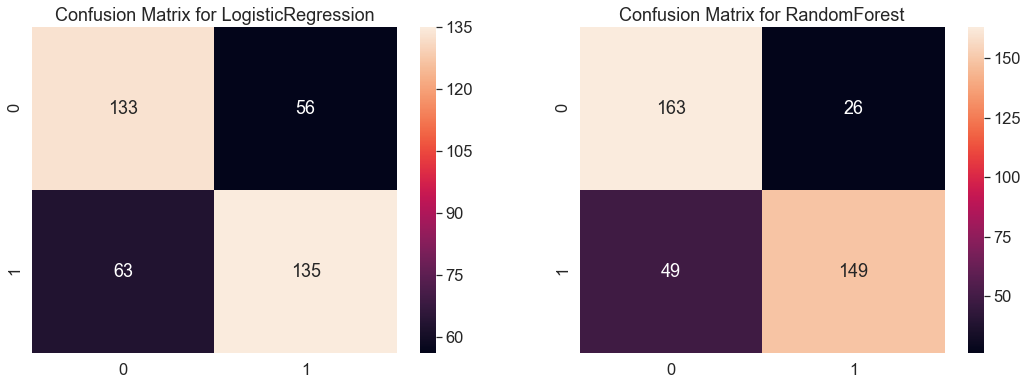

In [143]:
# Selected features
#cols = ['HR_Other.1', 'Total_activity_weekday', 'Total_Activity_Friday','Total_Activity_Saturday', 
#        'count_month', 'userwise_total_activities']
# Let's pick minimum and intuitive features and see how model performs 
#df1 = df[cols]
#X = df1
#y = df['kmeans_pred']

def confusion_matrix_plot(X, y):
    for i in range(len(models)):
        y_pred = cross_val_predict(models[i], X, y, cv=kfold)
        sns.heatmap(confusion_matrix(y,y_pred),ax=ax[i],annot=True,fmt='2.0f')
        ax[i].set_title('Confusion Matrix for '+ model_names[i]) 
        
fig, ax = plt.subplots(1,2,figsize=(18,6))
confusion_matrix_plot(X_train, y_train)

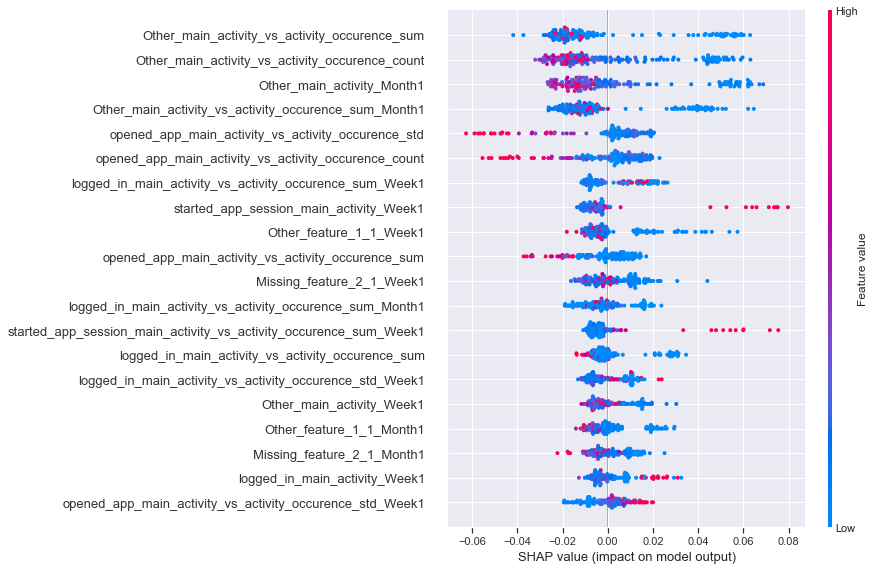

In [261]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

import shap  
# Create object that will calculate shap values
explainer = shap.TreeExplainer(rfc)

# Calculate shap_values for all of X_test1 rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test) 
# Summary plot
shap.summary_plot(shap_values[1], X_test)

In [110]:
#y_pred = gd_RFC.best_estimator_.predict(X_test) # columns removed with 50% missing values
print(f'AUC OF THE HYPERTUNED MODEL: {roc_auc_score(y_test, y_pred)}')
print(f'ACCURACY OF THE HYPERTUNED MODEL: {rfc.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))

AUC OF THE HYPERTUNED MODEL: 0.8048245614035087
ACCURACY OF THE HYPERTUNED MODEL: 0.8072289156626506
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        90
           1       0.80      0.78      0.79        76

    accuracy                           0.81       166
   macro avg       0.81      0.80      0.81       166
weighted avg       0.81      0.81      0.81       166



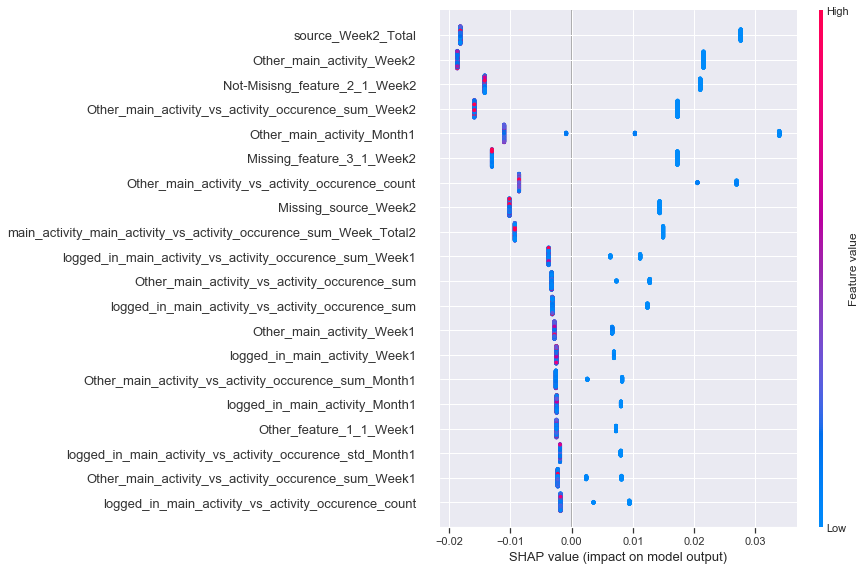

In [118]:
import shap  
# Create object that will calculate shap values
explainer = shap.TreeExplainer(gd_RFC.best_estimator_)

# Calculate shap_values for all of X_test1 rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train) 
# Summary plot
shap.summary_plot(shap_values[1], X_train)

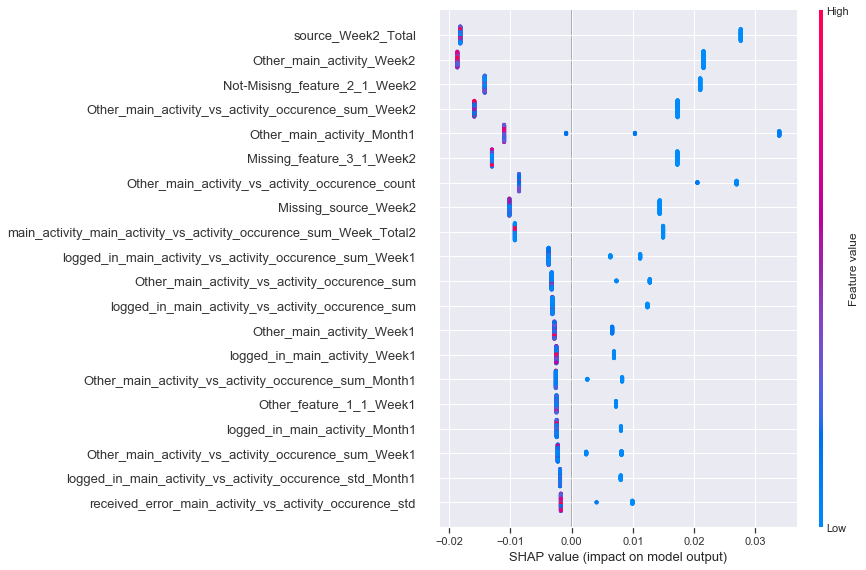

In [113]:
import shap  
# Create object that will calculate shap values
explainer = shap.TreeExplainer(rfc)

# Calculate shap_values for all of X_test1 rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test) 
# Summary plot
shap.summary_plot(shap_values[1], X_test)

In [117]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rfc, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0096 ± 0.0096,Other_main_activity_Week2
0.0060 ± 0.0076,Other_main_activity_vs_activity_occurence_count
0.0060 ± 0.0108,Other_main_activity_vs_activity_occurence_sum_Week2
0.0048 ± 0.0048,Other_main_activity_vs_activity_occurence_sum
0.0048 ± 0.0048,logged_in_main_activity_Month1
0.0048 ± 0.0048,logged_in_main_activity_vs_activity_occurence_std_Week1
0.0036 ± 0.0059,logged_in_main_activity_Week1
0.0036 ± 0.0059,logged_in_main_activity_vs_activity_occurence_std_Month1
0.0024 ± 0.0059,logged_in_main_activity_vs_activity_occurence_sum_Month1
0.0024 ± 0.0059,logged_in_main_activity_vs_activity_occurence_sum_Week1


In [145]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [148]:
rfc = gd_RFC.best_estimator_

In [151]:
# step forward feature selection
# I indicate that I want to select 10 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

sfs_bal = SFS(RandomForestClassifier(n_jobs=4), # n_jobs is no. of processor in computer
           k_features=20, # no. of features we want to select
           forward=True, # Step forward selection
           floating=False, 
           verbose=1,# outputs the result which helps to undersatnd at what feature t doesnt improve any mor
           scoring='roc_auc',
           cv=3)

sfs_bal = sfs_bal.fit(np.array(X_train), y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 817 out of 817 | elapsed: 28.9min finished
Features: 1/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 816 out of 816 | elapsed:  8.0min finished
Features: 2/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 815 out of 815 | elapsed:  8.1min finished
Features: 3/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 814 out of 814 | elapsed:  8.1min finished
Features: 4/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 813 out of 813 | elapsed:  8.1min finished
Features: 5/20[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 812 out of 812 | elapsed:  8.1min finished
Features: 6/20[Parallel(

In [153]:
# Features after balancing dataset
sfs_bal = X_train.columns[list(sfs_bal.k_feature_idx_)]
sfs_bal

Index(['segment_ios_source_Week6', 'started_session_main_activity_Week6', 'pressed_next_main_activity_Week8', 'Feature1_1_count_nUnique', 'watch_feature_1_1_Week5', 'other_feature_1_1_Week6', 'Other_feature_1_1_Week8', 'Missing_feature_2_1_Week1', 'Missing_feature_2_1_Week7', 'Missing_feature_3_1_Week2', 'Other_main_activity_vs_activity_occurence_count', 'started_app_session_main_activity_vs_activity_occurence_std', 'Other_main_activity_vs_activity_occurence_std_Month1', 'started_app_session_main_activity_vs_activity_occurence_sum_Week1', 'completed_session_main_activity_vs_activity_occurence_sum_Week3', 'started_session_main_activity_vs_activity_occurence_std_Week3', 'main_activity_main_activity_vs_activity_occurence_std_Week_Total3', 'logged_daily_sleep_main_activity_vs_activity_occurence_sum_Week6', 'interacted_with_media_main_activity_vs_activity_occurence_std_Week6', 'completed_session_main_activity_vs_activity_occurence_sum_Week7'], dtype='object')

In [195]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=9)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    pred2 = rf.predict(X_test)
    print(f'AUC OF THE HYPERTUNED MODEL: {roc_auc_score(y_test, pred2)}')
    print(classification_report(y_test, pred2))

# evaluate performance of algorithm built
# using selected features
run_randomForests(X_train[sfs_bal],
                  X_test[sfs_bal],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.999438832772166
Test set
Random Forests roc-auc: 0.9207602339181287
AUC OF THE HYPERTUNED MODEL: 0.8366959064327486
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        90
           1       0.82      0.83      0.82        76

    accuracy                           0.84       166
   macro avg       0.84      0.84      0.84       166
weighted avg       0.84      0.84      0.84       166



In [ ]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

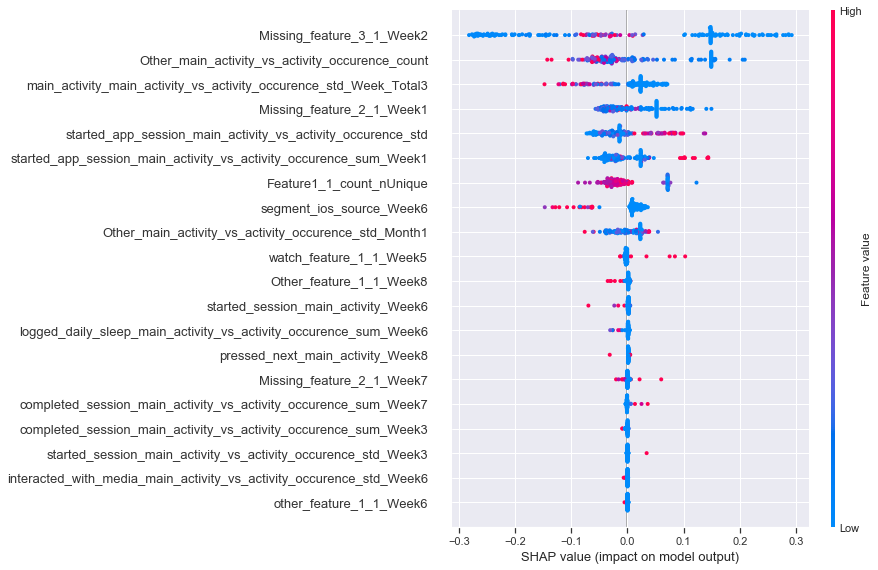

In [196]:
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=9)
rf.fit(X_train[sfs_bal], y_train)

import shap  
# Create object that will calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate shap_values for all of X_test1 rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test[sfs_bal]) 
# Summary plot
shap.summary_plot(shap_values[1], X_test[sfs_bal])

In [157]:
y_test.shape, y_train.shape

((166,), (387,))

In [163]:
cols = ['started_app_session_main_activity_vs_activity_occurence_sum_Week1', 
        'completed_session_main_activity_vs_activity_occurence_sum_Week3', 'started_session_main_activity_vs_activity_occurence_std_Week3', 
        'main_activity_main_activity_vs_activity_occurence_std_Week_Total3', 'logged_daily_sleep_main_activity_vs_activity_occurence_sum_Week6', 
        'interacted_with_media_main_activity_vs_activity_occurence_std_Week6', 'completed_session_main_activity_vs_activity_occurence_sum_Week7']

In [164]:
# evaluate performance of algorithm built
# using selected features
run_randomForests(X_train[cols],
                  X_test[cols],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8187296242851799
Test set
Random Forests roc-auc: 0.7258040935672515
AUC OF THE HYPERTUNED MODEL: 0.7045321637426902
              precision    recall  f1-score   support

           0       0.68      0.92      0.78        90
           1       0.84      0.49      0.62        76

    accuracy                           0.72       166
   macro avg       0.76      0.70      0.70       166
weighted avg       0.75      0.72      0.71       166

